In [146]:
import pandas as pd
import numpy as np
import os
os.chdir('D:\Documents')
os.getcwd()
import warnings
warnings.filterwarnings('ignore')

In [147]:
data=pd.read_csv('flights_sample_3m.csv')

In [148]:
data.head(3)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [150]:
data.AIRLINE.nunique()

18

In [151]:
data.AIRLINE.value_counts()

AIRLINE
Southwest Airlines Co.                576470
Delta Air Lines Inc.                  395239
American Airlines Inc.                383106
SkyWest Airlines Inc.                 343737
United Air Lines Inc.                 254504
Republic Airline                      143107
Envoy Air                             121256
JetBlue Airways                       112844
Endeavor Air Inc.                     112463
PSA Airlines Inc.                     107050
Alaska Airlines Inc.                  100467
Spirit Air Lines                       95711
Mesa Airlines Inc.                     65012
Frontier Airlines Inc.                 64466
Allegiant Air                          52738
Hawaiian Airlines Inc.                 32114
Horizon Air                            20634
ExpressJet Airlines LLC d/b/a aha!     19082
Name: count, dtype: int64

In [152]:
# Subsetting large data specific to South west for delay analysis

sw= data[data.AIRLINE=="Southwest Airlines Co."]
sw.shape

(576470, 32)

In [ ]:
data[data['AIRLINE']== 'Southwest Airlines Co.']

In [153]:
#checking for duplicate
sw.duplicated().sum()

np.int64(0)

In [154]:
#looking for Null
sw.isnull().sum()

FL_DATE                         0
AIRLINE                         0
AIRLINE_DOT                     0
AIRLINE_CODE                    0
DOT_CODE                        0
FL_NUMBER                       0
ORIGIN                          0
ORIGIN_CITY                     0
DEST                            0
DEST_CITY                       0
CRS_DEP_TIME                    0
DEP_TIME                    19365
DEP_DELAY                   19365
TAXI_OUT                    19438
WHEELS_OFF                  19438
WHEELS_ON                   19600
TAXI_IN                     19600
CRS_ARR_TIME                    0
ARR_TIME                    19599
ARR_DELAY                   20601
CANCELLED                       0
CANCELLATION_CODE          557005
DIVERTED                        0
CRS_ELAPSED_TIME                0
ELAPSED_TIME                20601
AIR_TIME                    20601
DISTANCE                        0
DELAY_DUE_CARRIER          469195
DELAY_DUE_WEATHER          469195
DELAY_DUE_NAS 

In [155]:
sw.dropna(subset=['DEP_TIME','DEP_DELAY','TAXI_OUT','TAXI_OUT','WHEELS_OFF','WHEELS_ON','TAXI_IN'],inplace=True)

# these makes no sense of feature for future model as these are NA

In [156]:
sw.drop(columns=['CANCELLATION_CODE','AIRLINE','AIRLINE_DOT','AIRLINE_CODE','DOT_CODE','ORIGIN_CITY','DEST_CITY'],inplace=True)

#these feature also not considered in modeling as of now

In [157]:
sw.isnull().sum()

FL_DATE                         0
FL_NUMBER                       0
ORIGIN                          0
DEST                            0
CRS_DEP_TIME                    0
DEP_TIME                        0
DEP_DELAY                       0
TAXI_OUT                        0
WHEELS_OFF                      0
WHEELS_ON                       0
TAXI_IN                         0
CRS_ARR_TIME                    0
ARR_TIME                        0
ARR_DELAY                    1001
CANCELLED                       0
DIVERTED                        0
CRS_ELAPSED_TIME                0
ELAPSED_TIME                 1001
AIR_TIME                     1001
DISTANCE                        0
DELAY_DUE_CARRIER          449595
DELAY_DUE_WEATHER          449595
DELAY_DUE_NAS              449595
DELAY_DUE_SECURITY         449595
DELAY_DUE_LATE_AIRCRAFT    449595
dtype: int64

In [158]:
sw.fillna(0,inplace=True) # remaining all na's filled with 0 as they are no delays

In [159]:
sw.isnull().sum()

FL_DATE                    0
FL_NUMBER                  0
ORIGIN                     0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                   0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
CRS_ARR_TIME               0
ARR_TIME                   0
ARR_DELAY                  0
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
dtype: int64

In [160]:
import pandas as pd

pd.set_option('display.max_columns', None)
#checking the columns how good for data 

In [161]:

#converting data into date and time for better analysis

sw['FL_DATE'] = pd.to_datetime(sw['FL_DATE'])

In [162]:
conv_columns=['DEP_TIME','DEP_DELAY','TAXI_OUT','WHEELS_OFF','WHEELS_ON','TAXI_IN','CRS_ARR_TIME','ARR_TIME','ARR_DELAY',
           'CRS_ELAPSED_TIME','ELAPSED_TIME','AIR_TIME','DELAY_DUE_CARRIER','DELAY_DUE_WEATHER','DELAY_DUE_NAS',
           'DELAY_DUE_SECURITY','DELAY_DUE_LATE_AIRCRAFT']

## these are the columns are in string datatype need to convert to time for better analysis.


In [163]:

from datetime import time

def conv_time(val):
    if pd.isnull(val):
        return pd.NaT
    if str(val).strip() in ['0', '0000']:
        return time(0, 0)
    
    val_str = str(int(float(val))).zfill(4)
    hour = int(val_str[:2])
    minute = int(val_str[2:])
    
    if hour > 23 or minute > 59:
        return time (0,0)
    
    return time(hour, minute)



In [164]:
sw

,FL_DATE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
5,2019-07-31,665,DAL,OKC,1010,1237.0,147.0,15.0,1252.0,1328.0,3.0,1110,1331.0,141.0,0.0,0.0,60.0,54.0,36.0,181.0,141.0,0.0,0.0,0.0,0.0
12,2021-08-05,430,MDW,BNA,820,826.0,6.0,10.0,836.0,935.0,6.0,940,941.0,1.0,0.0,0.0,80.0,75.0,59.0,395.0,0.0,0.0,0.0,0.0,0.0
15,2022-05-01,1011,BWI,BDL,1735,1738.0,3.0,12.0,1750.0,1843.0,3.0,1840,1846.0,6.0,0.0,0.0,65.0,68.0,53.0,283.0,0.0,0.0,0.0,0.0,0.0
17,2021-12-25,2516,DAL,MSY,1435,1428.0,-7.0,9.0,1437.0,1533.0,3.0,1600,1536.0,-24.0,0.0,0.0,85.0,68.0,56.0,436.0,0.0,0.0,0.0,0.0,0.0
35,2019-12-25,3711,BNA,MCI,1715,1711.0,-4.0,8.0,1719.0,1835.0,6.0,1855,1841.0,-14.0,0.0,0.0,100.0,90.0,76.0,491.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999968,2020-07-03,2127,RDU,BWI,1020,1016.0,-4.0,6.0,1022.0,1106.0,15.0,1125,1121.0,-4.0,0.0,0.0,65.0,65.0,44.0,255.0,0.0,0.0,0.0,0.0,0.0
2999976,2023-03-13,3197,OAK,LAS,800,758.0,-2.0,13.0,811.0,911.0,4.0,935,915.0,-20.0,0.0,0.0,95.0,77.0,60.0,407.0,0.0,0.0,0.0,0.0,0.0
2999979,2020-10-16,1289,ATL,LAS,1710,1709.0,-1.0,13.0,1722.0,1829.0,6.0,1825,1835.0,10.0,0.0,0.0,255.0,266.0,247.0,1747.0,0.0,0.0,0.0,0.0,0.0
2999987,2020-09-26,1555,BNA,MCO,1810,1803.0,-7.0,8.0,1811.0,2033.0,8.0,2100,2041.0,-19.0,0.0,0.0,110.0,98.0,82.0,616.0,0.0,0.0,0.0,0.0,0.0


In [165]:
for col in conv_columns:
    if col in sw.columns:   # avoid KeyError if column missing
        sw[col] = sw[col].apply(conv_time)

In [166]:
sw.head(10)

,FL_DATE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
5,2019-07-31,665,DAL,OKC,1010,12:37:00,01:47:00,00:15:00,12:52:00,13:28:00,00:03:00,11:10:00,13:31:00,01:41:00,0.0,0.0,00:00:00,00:54:00,00:36:00,181.0,01:41:00,00:00:00,00:00:00,00:00:00,00:00:00
12,2021-08-05,430,MDW,BNA,820,08:26:00,00:06:00,00:10:00,08:36:00,09:35:00,00:06:00,09:40:00,09:41:00,00:01:00,0.0,0.0,00:00:00,00:00:00,00:59:00,395.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
15,2022-05-01,1011,BWI,BDL,1735,17:38:00,00:03:00,00:12:00,17:50:00,18:43:00,00:03:00,18:40:00,18:46:00,00:06:00,0.0,0.0,00:00:00,00:00:00,00:53:00,283.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
17,2021-12-25,2516,DAL,MSY,1435,14:28:00,00:07:00,00:09:00,14:37:00,15:33:00,00:03:00,16:00:00,15:36:00,00:24:00,0.0,0.0,00:00:00,00:00:00,00:56:00,436.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
35,2019-12-25,3711,BNA,MCI,1715,17:11:00,00:04:00,00:08:00,17:19:00,18:35:00,00:06:00,18:55:00,18:41:00,00:14:00,0.0,0.0,01:00:00,00:00:00,00:00:00,491.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
37,2019-07-18,992,IND,TPA,2135,22:54:00,00:00:00,00:06:00,23:00:00,00:44:00,00:03:00,23:50:00,00:47:00,00:57:00,0.0,0.0,01:35:00,01:13:00,01:04:00,837.0,00:57:00,00:00:00,00:00:00,00:00:00,00:00:00
46,2022-05-17,4041,BWI,MHT,755,07:50:00,00:05:00,00:13:00,08:03:00,09:02:00,00:05:00,09:15:00,09:07:00,00:08:00,0.0,0.0,00:00:00,00:00:00,00:59:00,377.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
52,2023-04-08,3355,MDW,SAT,2120,21:33:00,00:13:00,00:07:00,21:40:00,00:02:00,00:03:00,00:15:00,00:05:00,00:10:00,0.0,0.0,00:00:00,01:52:00,01:42:00,1036.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
56,2019-01-07,397,SAT,DAL,1350,14:01:00,00:11:00,00:06:00,14:07:00,14:52:00,00:03:00,14:55:00,14:55:00,00:00:00,0.0,0.0,00:00:00,00:54:00,00:45:00,248.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
62,2019-02-27,760,MDW,MHT,2120,22:03:00,00:43:00,00:15:00,22:18:00,00:52:00,00:04:00,00:25:00,00:56:00,00:31:00,0.0,0.0,01:25:00,01:13:00,00:00:00,838.0,00:31:00,00:00:00,00:00:00,00:00:00,00:00:00


In [167]:
sw.isnull().sum()

FL_DATE                    0
FL_NUMBER                  0
ORIGIN                     0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                   0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
CRS_ARR_TIME               0
ARR_TIME                   0
ARR_DELAY                  0
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
dtype: int64

In [168]:
sw.head()

,FL_DATE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
5,2019-07-31,665,DAL,OKC,1010,12:37:00,01:47:00,00:15:00,12:52:00,13:28:00,00:03:00,11:10:00,13:31:00,01:41:00,0.0,0.0,00:00:00,00:54:00,00:36:00,181.0,01:41:00,00:00:00,00:00:00,00:00:00,00:00:00
12,2021-08-05,430,MDW,BNA,820,08:26:00,00:06:00,00:10:00,08:36:00,09:35:00,00:06:00,09:40:00,09:41:00,00:01:00,0.0,0.0,00:00:00,00:00:00,00:59:00,395.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
15,2022-05-01,1011,BWI,BDL,1735,17:38:00,00:03:00,00:12:00,17:50:00,18:43:00,00:03:00,18:40:00,18:46:00,00:06:00,0.0,0.0,00:00:00,00:00:00,00:53:00,283.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
17,2021-12-25,2516,DAL,MSY,1435,14:28:00,00:07:00,00:09:00,14:37:00,15:33:00,00:03:00,16:00:00,15:36:00,00:24:00,0.0,0.0,00:00:00,00:00:00,00:56:00,436.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
35,2019-12-25,3711,BNA,MCI,1715,17:11:00,00:04:00,00:08:00,17:19:00,18:35:00,00:06:00,18:55:00,18:41:00,00:14:00,0.0,0.0,01:00:00,00:00:00,00:00:00,491.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00


In [170]:
sw.sort_values('FL_DATE',inplace=True,ignore_index=True) #sorting date 

In [171]:
sw.head()

,FL_DATE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-01,928,OAK,BUR,820,08:13:00,00:07:00,00:15:00,08:28:00,09:21:00,00:03:00,09:25:00,09:24:00,00:01:00,0.0,0.0,00:00:00,00:00:00,00:53:00,325.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
1,2019-01-01,165,TPA,MDW,2010,20:00:00,00:10:00,00:08:00,20:08:00,21:20:00,00:06:00,21:50:00,21:26:00,00:24:00,0.0,0.0,00:00:00,01:46:00,01:32:00,997.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
2,2019-01-01,2271,TPA,MDW,555,06:04:00,00:09:00,00:09:00,06:13:00,07:29:00,00:02:00,07:40:00,07:31:00,00:09:00,0.0,0.0,00:00:00,01:47:00,01:36:00,997.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
3,2019-01-01,620,SMF,ONT,1340,13:37:00,00:03:00,00:10:00,13:47:00,14:48:00,00:03:00,14:55:00,14:51:00,00:04:00,0.0,0.0,00:00:00,00:00:00,00:00:00,390.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
4,2019-01-01,1705,OMA,STL,615,06:16:00,00:01:00,00:29:00,06:45:00,07:36:00,00:03:00,07:25:00,07:39:00,00:14:00,0.0,0.0,00:00:00,00:00:00,00:51:00,342.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00


In [173]:
# Convert time objects to minutes or seconds before adding
# Assuming the delay columns contain datetime.time objects
def time_to_minutes(t):
    if pd.isna(t):
        return 0
    return t.hour * 60 + t.minute + t.second / 60

# Apply the conversion to each column and then add
sw['Total_Delay'] = (
    sw['DELAY_DUE_CARRIER'].apply(time_to_minutes) +
    sw['DELAY_DUE_WEATHER'].apply(time_to_minutes) +
    sw['DELAY_DUE_NAS'].apply(time_to_minutes) +
    sw['DELAY_DUE_SECURITY'].apply(time_to_minutes) +
    sw['DELAY_DUE_LATE_AIRCRAFT'].apply(time_to_minutes)
)

# Note: You may need to import pandas if not already imported
# import pandas as pd

In [177]:
sw.describe()

,FL_DATE,FL_NUMBER,CRS_DEP_TIME,CANCELLED,DIVERTED,DISTANCE,Total_Delay
count,556870,556870.000000,556870.000000,556870.0,556870.000000,556870.0000,556870.000000
mean,2021-05-26 22:53:02.470594816,2073.808490,1329.463151,0.0,0.001798,740.7872,6.742080
min,2019-01-01 00:00:00,1.000000,500.000000,0.0,0.000000,73.0000,0.000000
25%,2020-01-09 00:00:00,919.000000,910.000000,0.0,0.000000,386.0000,0.000000
50%,2021-07-20 00:00:00,1816.000000,1325.000000,0.0,0.000000,639.0000,0.000000
75%,2022-09-01 00:00:00,2838.000000,1735.000000,0.0,0.000000,972.0000,0.000000
max,2023-08-31 00:00:00,6999.000000,2350.000000,0.0,1.000000,2979.0000,457.000000
std,NaN,1493.827393,483.730559,0.0,0.042359,460.6372,18.476781


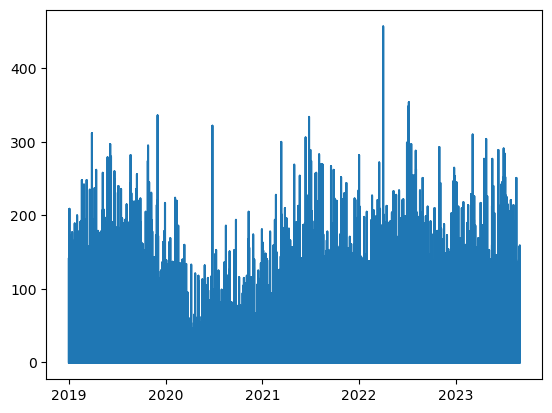

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(sw['FL_DATE'],sw['Total_Delay'])
plt.show()

!pip install mplfinance

In [190]:
#Using standardization

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [191]:
sw.columns

Index(['FL_DATE', 'FL_NUMBER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'Total_Delay'],
      dtype='object')

In [194]:
x=sw[['DEP_TIME','DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN','ARR_DELAY']]
y=sw['Total_Delay']

In [196]:

x_numeric = pd.DataFrame(x).applymap(lambda t: t.hour * 3600 + t.minute * 60 + t.second if isinstance(t, datetime.time) else t)
x_scaled = sc.fit_transform(x_numeric)

y_numeric = pd.DataFrame(y).applymap(lambda t: t.hour * 3600 + t.minute * 60 + t.second if isinstance(t, datetime.time) else t)
y_scaled = sc.fit_transform(y_numeric)



In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score

In [203]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=42)

In [204]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [205]:
y_pred=lr.predict(X_test)
y_pred

array([[-0.55848783],
       [ 1.73803187],
       [ 0.47427923],
       ...,
       [-0.42734063],
       [-0.36449824],
       [-0.2155963 ]])

In [207]:

if not isinstance(y_test, pd.DataFrame):
    result = pd.DataFrame(y_test, columns=['actual'])
else:
    result = y_test.copy()  # Create a copy to avoid modifying the original

result['predict'] = y_pred

result

,actual,predict
0,-0.364895,-0.558488
1,2.178840,1.738032
2,0.501057,0.474279
3,0.663424,0.540397
4,-0.364895,-0.318963
...,...,...
183763,2.070596,1.681316
183764,-0.364895,-0.271386
183765,-0.364895,-0.427341
183766,-0.364895,-0.364498


In [208]:
lr.intercept_

array([0.00027324])

In [209]:
lr.coef_

array([[ 0.15350042,  0.35763026,  0.13786392, -0.03589028, -0.0453103 ,
         0.09623244,  0.45414983]])

In [210]:
import statsmodels.api as sm
X2=sm.add_constant(X_train)
est=sm.OLS(y_train,X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                 8.309e+04
Date:                Fri, 24 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:42:03   Log-Likelihood:            -3.5277e+05
No. Observations:              373102   AIC:                         7.056e+05
Df Residuals:                  373094   BIC:                         7.056e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.268      0.7